In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math

# TODO:
TODO: Write about theorem 2.56
TODO: Write the formula for how to calculate confidence interval
TODO: none vs Paired t-test


# Plots

## Box plot

## Scatter plot

## QQ - plot
The plots shows the sample data on the Y-axis
the x-axis are the values if they followed the noraml distribution perfectly 
a diagonal line is plotted for reference if the data points follows the diagonal line then the data follows a normal distribution

# Random Varibles

TODO: Write about theorem 2.56

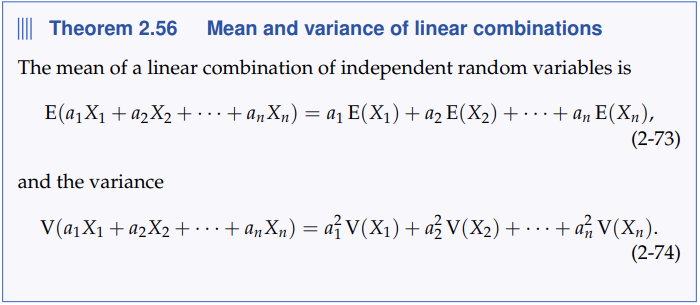

### Calculate Variance:

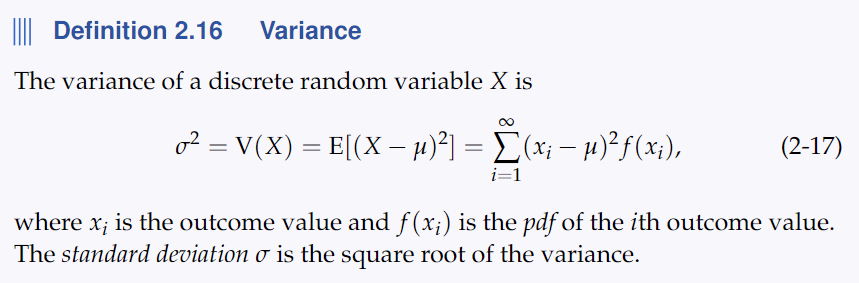


In [287]:
import numpy as np

# Define the values and probabilities
x = np.array([0, 1, 2, 4])  # Values of the random variable
f = np.array([0.17, 0.22 ,0.28, 0.33])  # Probabilities

# Calculate the mean
mean = np.sum(x * f)
print(f"Mean: {mean:.2f}")

# Calculate the variance
variance = np.sum((x - mean)**2 * f)
print(f"Variance: {variance:.2f}")

Mean: 2.10
Variance: 2.21


## The non-linear approximative error propagation rule


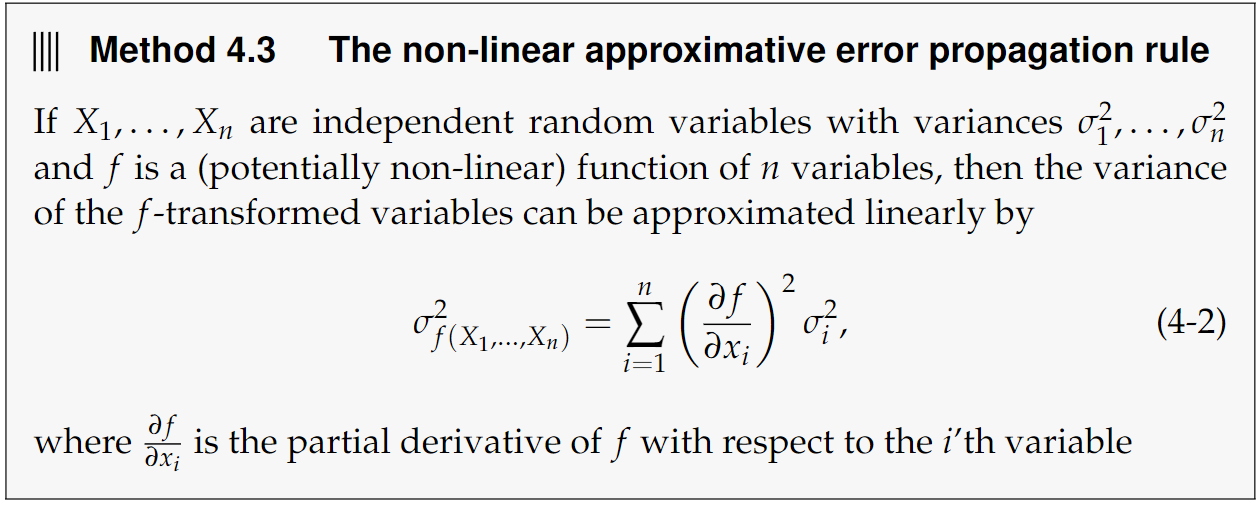


Type:
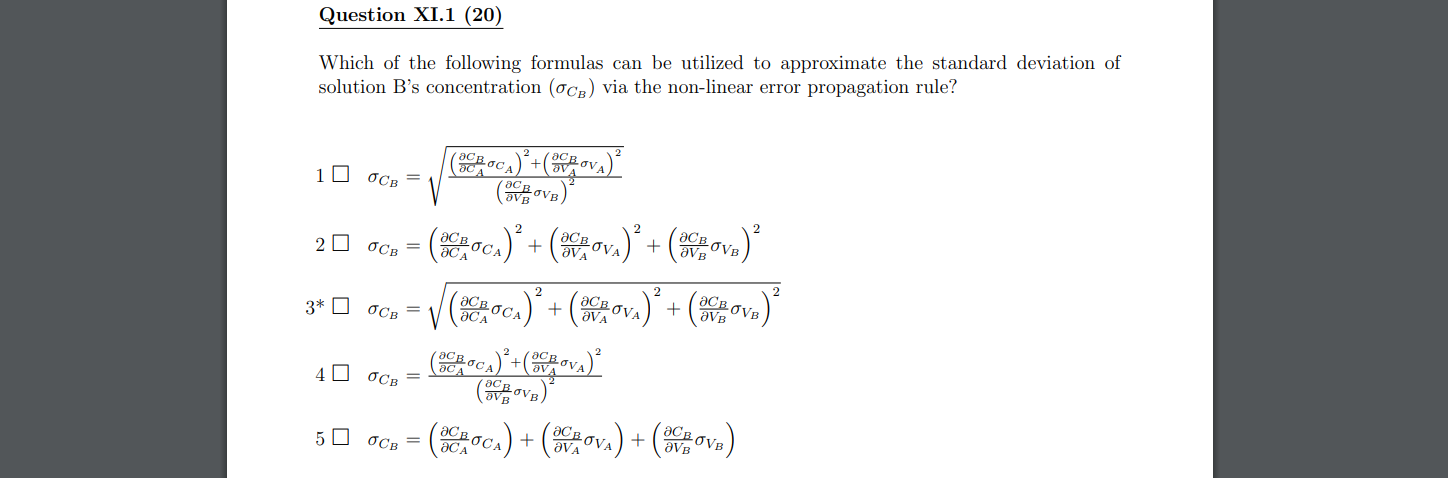











# Central Limit Theorem (CLT)

1. **Definition**  
   The CLT states that the sampling distribution of the sample mean will approximate a normal distribution as the sample size becomes large, regardless of the population's original distribution.  

2. **Mathematical Formulation**  
   If $ X_1, X_2, \dots, X_n $ are independent and identically distributed (i.i.d.) random variables with mean $ \mu $ and variance $ \sigma^2 $, then the sample mean $ \bar{X} $ is:  
   
   $$ \bar{X} = \frac{1}{n} \sum_{i=1}^n X_i $$  

   As $ n \to \infty $:  
   $$ \sqrt{n} \left( \bar{X} - \mu \right) \xrightarrow{d} N(0, \sigma^2) $$  

3. **Assumptions**  
   - The random variables are i.i.d.
   - The population has finite variance (\( \sigma^2 < \infty \)).  

4. **Applications**  
   - Approximation of probabilities for large samples.
   - Basis for inferential statistics (e.g., confidence intervals, hypothesis testing).

**Implications**
- The approximation becomes better as \( n \) increases.  
- Even non-normal distributions converge to normality under large \( n \).




# Distributions


Discrete distributions:
- Binomial distribution
- Hypergeometric distribution
- Poisson distribution

Contiunous distribution:
- Uniform distribution
- Normal Distribution
- Exponential Distribtion

## Binomial distribution
1. **Mean (Expected Value):** $\mathbb{E}[X] = n \cdot p$
2. **Variance:** $\text{Var}(X) = n \cdot p \cdot (1 - p)$
3. **Standard Deviation:** $\sigma = \sqrt{n \cdot p \cdot (1 - p)}$

### Binom PMF P(X = K)

In [ ]:
# Parameters for the binomial distribution
m = 190      # number of trials
p = 0.45     # probability of success
k = 100       # Testing Value

# P(X = 5)
retval_eq_k = stats.binom.pmf(k=k ,n=m, p=p)

# Print result
print(f"P(X = {k}) = {retval_eq_k}")

# Get mean and variance
mean, var = stats.binom.stats(n=m, p=p)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X = 5) = 0.20065812479999992
Mean: 6.0
Variance: 2.4000000000000004


### Binom CDF: P(X > k)

In [77]:
# Parameters for the binomial distribution
m = 190      # number of trials
p = 0.45     # probability of success
k = 99       # Testing Value

# P(X > k)
retval_greater_than_k = 1 - stats.binom.cdf(k, m, p)  # CDF for k
# Print result
print(f"P(X > {k}) = {retval_greater_than_k}")

# Get mean and variance
mean, var = stats.binom.stats(n=m, p=p)
print(f"Mean: {mean}")
print(f"Variance: {var}")






P(X > 99) = 0.02083802286908354
Mean: 85.5
Variance: 47.025000000000006


### Binom CDF: P(X < k)

In [290]:
# Parameters for the binomial distribution
m = 6       # number of trials
p = 0.35      # probability of success
k = 2        # Testing Value

# P(X < 5) = P(X <= k)
retval_less_than_k = stats.binom.cdf(k - 1, m, p)  # CDF for k - 1'
print(f"P(X < {k}) = {retval_less_than_k}")

# Get mean and variance
mean, var = stats.binom.stats(n=m, p=p)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X < 2) = 0.319079921875
Mean: 2.0999999999999996
Variance: 1.3649999999999998


## Poisson distribution
1. **Mean (Expected Value):** $ \mathbb{E}[X] = \lambda $
2. **Variance:** $ \text{Var}(X) = \lambda $
3. **Standard Deviation:** $ \sigma = \sqrt{\lambda} $


### Connection Between Poisson and Exponential Distributions

The **Poisson** and **Exponential** distributions are closely related as they both arise from **Poisson processes**, which model events occurring randomly over time or space.

#### 1. Connection
- The **Poisson distribution** models the **number of events** that occur in a fixed interval of time or space, given a constant rate \( \lambda \).
- The **Exponential distribution** models the **time between consecutive events** in a Poisson process, also with rate \( \lambda \).
- Key Relationship:
  - If events follow a Poisson process:
    - The count of events in an interval is Poisson distributed.
    - The time until the next event (or between events) is exponentially distributed.

#### 2. When to Use Poisson
Use the Poisson distribution when you need to calculate the **probability of a specific number of events** occurring in a fixed interval. Examples include:
- The number of calls received by a call center in an hour.
- The number of accidents occurring on a highway in a day.

#### 3. When to Use Exponential
Use the Exponential distribution when you want to model the **time between events** in a Poisson process. Examples include:
- The time until the next customer arrives at a service desk.
- The time between failures of a machine.

### Poisson PMF: P(X = k)

In [6]:
# Parameters for Poisson distribution
lambda_val = 2.5  # mean (expected number of events)

k = 10           # number of events we want the probability for

# Calculate Poisson PMF
poisson_pmf = stats.poisson.pmf(k, lambda_val)
print(f"P(X = {k}) = {poisson_pmf}")

P(X = 10) = 0.00021572518449585165


### Poisson CDF: P(X < k)

In [292]:
# Parameters for Poisson distribution
lambda_val = 2.5  # mean (expected number of events)
k = 5         # upper limit of events for cumulative probability

# Calculate Poisson CDF for P(X < k), which is actually P(X <= k-1)
poisson_cdf = stats.poisson.cdf(k - 1, lambda_val)


print(f"P(X < {k}) = {poisson_cdf}")


P(X < 5) = 0.8911780189141513


### Poisson CDF: P(X > k)

In [293]:

# Parameters
lambda_val = 2.5  # mean (expected number of events)
k = 5      # lower limit of events for the "greater than" probability

# Calculate Poisson CDF for P(X > k)
poisson_prob_greater = 1 - stats.poisson.cdf(k, lambda_val)

print(f"P(X > {k}) = {poisson_prob_greater}")

P(X > 5) = 0.042021038195306115


## Hypergeometric distribution

Let $X \sim \text{Hypergeometric}(N, K, n)$, where:
- $N$ is the population size,
- $K$ is the number of successes in the population,
- $n$ is the number of draws.

1. **Mean (Expected Value):** $\mathbb{E}[X] = n \cdot \frac{K}{N}$


2. **Variance:** $\text{Var}(X) = n \cdot \frac{K}{N} \cdot \frac{N - K}{N} \cdot \frac{N - n}{N - 1}$


3. **Standard Deviation:** $\sigma = \sqrt{n \cdot \frac{K}{N} \cdot \frac{N - K}{N} \cdot \frac{N - n}{N - 1}}$

### Hyper PMF: P(X = k)

In [294]:
# Parameters for the hypergeometric distribution
N = 20       # Total population size
K = 12       # Number of successes in the population
m = 10       # Sample size
k = 5        # Testing value for exactly 5 successes

# P(X = k)
retval_equal_to_k = stats.hypergeom.pmf(k, N, K, m)  # PMF for k
print(f"P(X = {k}) = {retval_equal_to_k:.4f}")

mean, var = stats.hypergeom.stats(N, K, m)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X = 5) = 0.2401
Mean: 6.0
Variance: 1.263157894736842


### Hyper CDF: P(X < k)

In [295]:
# Parameters for the hypergeometric distribution
N = 10       # Total population size
K = 7       # Number of successes in the population
m = 3       # Sample size

k = 2        # Testing threshold

# P(X < 5) = P(X <= 4)
retval_less_than_k = stats.hypergeom.cdf(k - 1, N, K, m)  # CDF for k - 1
print(f"P(X < {k}) = {retval_less_than_k:.4f}")


mean, var = stats.hypergeom.stats(N, K, m)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X < 2) = 0.1833
Mean: 2.1
Variance: 0.49


### Hyper CDF: P(X > k)

In [296]:
# Parameters for the hypergeometric distribution
N = 20       # Total population size
K = 12       # Number of successes in the population
m = 10       # Sample size
k = 5        # Testing threshold

# P(X > k) = 1 - P(X <= k)
retval_greater_than_k = 1 - stats.hypergeom.cdf(k, N, K, m)
print(f"P(X > {k}) = {retval_greater_than_k:.4f}")

mean, var = stats.hypergeom.stats(N, K, m)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 5) = 0.6750
Mean: 6.0
Variance: 1.263157894736842


## Uniform Distrubution
1. **Mean (Expected Value):**  $\mathbb{E}[X] = \frac{a + b}{2}$
2. **Variance:**  $\text{Var}(X) = \frac{(b - a)^2}{12}$
3. **Standard Deviation:**  $\sigma = \frac{b - a}{\sqrt{12}}$


### Uniform: P(X < k)

In [297]:
from scipy.stats import uniform

# Parameters
a = 0        # Lower bound of the distribution
b = 10       # Upper bound of the distribution
k = 6        # Value to calculate P(X < k)

# Calculate Uniform CDF for P(X < k)
uniform_cdf = uniform.cdf(k, loc=a, scale=b - a)

print(f"P(X < {k}) = {uniform_cdf}")

# Calculate mean and variance
mean, var = uniform.stats(loc=a, scale=b - a, moments='mv')
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X < 6) = 0.6
Mean: 5.0
Variance: 8.333333333333332


### Uniform: P(X > k)

In [298]:
from scipy.stats import uniform

# Parameters
a = 0        # Lower bound of the distribution
b = 10       # Upper bound of the distribution
k = 6        # Value to calculate P(X > k)

# Calculate Uniform CDF for P(X < k)
uniform_cdf = uniform.cdf(k, loc=a, scale=b - a)

# Calculate P(X > k)
uniform_sf = 1 - uniform_cdf  # Alternatively, use survival function: uniform.sf(k, loc=a, scale=b - a)

print(f"P(X > {k}) = {uniform_sf}")

# Calculate mean and variance
mean, var = uniform.stats(loc=a, scale=b - a, moments='mv')
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 6) = 0.4
Mean: 5.0
Variance: 8.333333333333332


## Normal distribution

1. **Mean (Expected Value):** $ \mathbb{E}[X] = \mu $
2. **Variance:** $ \text{Var}(X) = \sigma^2 $
3. **Standard Deviation:** $ \sigma = \sqrt{\sigma^2} $


### Normal: P(X < k)

In [299]:
# Parameters
mu = 55        # mean of the distribution
sigma = 19     # standard deviation of the distribution

k = 1.5       # value to calculate P(X < k)

# Calculate Normal CDF for P(X < k)
normal_cdf = stats.norm.cdf(k, mu, sigma)

print(f"P(X < {k}) = {normal_cdf}")

# Calculate mean and variance
mean, var = stats.norm.stats(loc=mu, scale=sigma)
print(f"Mean: {mean}")
print(f"Variance: {var}")






P(X < 1.5) = 0.002432877005565338
Mean: 55.0
Variance: 361.0


### Normal: P(X > k)

In [300]:
# Parameters
mu = 0        # mean of the distribution
sigma = 1     # standard deviation of the distribution
k = 1.5       # value to calculate P(X > k)

# Calculate Normal CDF for P(X > k)
normal_prob_greater = 1 - stats.norm.cdf(k, mu, sigma)

print(f"P(X > {k}) = {normal_prob_greater}")


# Calculate mean and variance
mean, var = stats.norm.stats(loc=mu, scale=sigma)

print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 1.5) = 0.06680720126885809
Mean: 0.0
Variance: 1.0


### Simulating with norm

In [ ]:
mu = 4.03        # mean of the distribution

sigma = 1     # standard deviation of the distribution


sim = stats.norm.rvs(loc=mu, scale=sigma, size=10000)
array = np.array(sim)


stats.ttest_1samp(array, 789879).confidence_interval(0.99)



ConfidenceInterval(low=3.994337261099438, high=4.045962161434347)

## Exponential Distribtion

1. **Mean (Expected Value):** $ \mathbb{E}[X] = \frac{1}{\lambda} $
2. **Variance:** $ \text{Var}(X) = \frac{1}{\lambda^2} $
3. **Standard Deviation:** $ \sigma = \frac{1}{\lambda} $

### Exponential: P(X < k)

In [ ]:
# Parameters
lambda_val = 2.5
rate_param = 1 / lambda_val
k = 2

# Calculate Exponential CDF for P(X < k)
expo_cdf = stats.expon.cdf(k, scale=rate_param)

print(f"P(X < {k}) = {expo_cdf}")

# Calculate mean and variance
mean, var = stats.expon.stats(scale=rate_param)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X < 2) = 0.006737946999085476
Mean: 0.4
Variance: 0.16000000000000003


### Exponential: P(X > k)


In [20]:
# Parameters
lambda_val = 15/60
rate_param = 1 / lambda_val

k = 2

# Calculate Exponential CDF for P(X > k)
expo_prob_greater = 1 - stats.expon.cdf(k, scale=rate_param)

print(f"P(X > {k}) = {expo_prob_greater}")

# Calculate mean and variance
mean, var = stats.expon.stats(scale=rate_param)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 2) = 0.6065306597126334
Mean: 4.0
Variance: 16.0


### Simulating with exp

In [305]:

x1 = stats.expon.rvs(scale=1/1.2, size=10000)
x2 = stats.expon.rvs(scale=1/1.7, size=10000)

z = x1 + x2

# Calculate the probability P(X + Y > 3)
p_gt_3 = np.mean(z > 3)
print(p_gt_3)



0.0771


## Log-Normal Distribution

1. **Mean (Expected Value):**  $ \mathbb{E}[X] = e^{\mu + \frac{\sigma^2}{2}} $
2. **Variance:**  $ \text{Var}(X) = \left(e^{\sigma^2} - 1\right) e^{2\mu + \sigma^2} $
3. **Standard Deviation:**   $ \sigma_X = \sqrt{\text{Var}(X)} = \sqrt{\left(e^{\sigma^2} - 1\right) e^{2\mu + \sigma^2}} $

### log-normal: P(X > k)

In [306]:
import scipy.stats as stats
import numpy as np

# Parameters
mu = 0.5  # Mean of the underlying normal distribution
sigma = 0.25  # Standard deviation of the underlying normal distribution
k = 2  # Threshold value

# Calculate P(X > k)
prob_greater = 1 - stats.lognorm.cdf(k, s=sigma, scale=np.exp(mu))

print(f"P(X > {k}) = {prob_greater}")


# Calculate mean and variance
mean, var = stats.lognorm.stats(s=sigma, scale=np.exp(mu), moments='mv')

print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 2) = 0.21988291048777586
Mean: 1.7010573018484005
Variance: 0.18662090474626997


### log-normal: P(X < k)

In [307]:
import scipy.stats as stats
import numpy as np

# Parameters
mu = 0.5  # Mean of the underlying normal distribution
sigma = 0.25  # Standard deviation of the underlying normal distribution
k = 2  # Threshold value

# Calculate P(X < k)
prob_less = stats.lognorm.cdf(k, s=sigma, scale=np.exp(mu))

print(f"P(X < {k}) = {prob_less}")

# Calculate mean and variance
mean, var = stats.lognorm.stats(s=sigma, scale=np.exp(mu), moments='mv')

print(f"Mean: {mean}")
print(f"Variance: {var}")


P(X < 2) = 0.7801170895122241
Mean: 1.7010573018484005
Variance: 0.18662090474626997


# Confidence Intervals

### standard error types 
there are two different kinds of standard error 

one for a proportion
$$
    SE = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$
where p is sampel proportion
$$
    ( \hat{p} = \frac{\text{Number of Successes}}{\text{Sample Size}} ).
$$
and n is sample size




AND ONE FOR A MEAN
$$
    SE = \frac{s}{\sqrt{n}}
$$
where s is std
(this is also used for paired t test so fx difference in two means that are not independant

AND FOR TWO MEANS
$$
  \text{SE}(\bar{x}_1 - \bar{x}_2) = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}  
$$
(two means that are independant)

 ### confidence interval steps

1 : identify sample statistic (proportion or mean)

2 : calculate standard error
 
3 : determine critical value
 
The critical value ( z  for large samples or  t  for smaller samples) corresponds to the desired confidence level:
* For a 95% confidence level,  z^
* \approx 1.96  (normal distribution).
* Use  t  for small samples or unknown population variance.

a sample is small when it is 30>n so anything 30 or above is a large sample 

4 : calculate margin of error = critical value * standard error

5 : construct confidence interval. sample statistic +- margin of error


In [ ]:


data = np.array([8500, 10300, 6800, 10600, 4900, 6200, 10800, 5700, 5100, 9000])
print(stats.ttest_1samp(data, 789879).confidence_interval(0.99))

ConfidenceInterval(low=4.920953468828213, high=10.857046531171784)


## One Sample

### Normally distributed:

#### With Z-distribution:
**Use the Z-distribution (standard normal) when:**
   - The population standard deviation ($\sigma$) is **known**.
   - The sample size is large ($n > 30$), even if $\sigma$ is unknown (due to the Central Limit Theorem).

In [25]:
# Define inputs
sample_mean = 34.66  # Example: mean duration
sample_std = 10.12    # Example: standard deviation
sample_size = 40   # Example: sample size
confidence_level = 0.99

# Calculate Z-score for 99% confidence
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Compute margin of error
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

# Calculate confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error


print(f"CI: [{lower_bound:.2f};{upper_bound:.2f}]")

CI: [30.54;38.78]


#### With t-Distribution
**Use the $t$-distribution when:**
   - The population standard deviation ($\sigma$) is **unknown**.
   - The sample size is small ($n \leq 30$), making the normal approximation unreliable.

In [87]:

# Inputs
mean = 3505.7  # Sample mean
s = 467.9  # Sample standard deviation
m = 50  # Sample size
confidence_level = 0.95

# Degrees of freedom
df = m - 1
##df = 43

# t-score
t_score = stats.t.ppf(1 - (1 - confidence_level) / 2, df)

print("tscore:", t_score)

# Confidence interval

std_err = s / np.sqrt(m)

margin_of_error = t_score * std_err

lower = mean - margin_of_error
upper = mean + margin_of_error

print(f"CI: [{lower:.2f}, {upper:.2f}]")

tscore: 2.009575234489209
CI: [3372.72, 3638.68]


## Confidence Interval for Std. 

In [ ]:

# Example usage
sample_std = 0.09        # Sample standard deviation
sample_size = 30        # Sample size
confidence_level = 0.95 # Confidence level

df = sample_size - 1

# Alpha
alpha = 1 - confidence_level

# Chi-square critical values
chi2_lower = stats.chi2.ppf(alpha / 2, df)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df)

# Confidence interval bounds
lower_bound = np.sqrt((df * sample_std**2) / chi2_upper)
upper_bound = np.sqrt((df * sample_std**2) / chi2_lower)

print("[" , lower_bound , ";" ,  upper_bound , "]")

[ 0.07167662394863719 ; 0.12098836613164016 ]


## Two Sample

# Hypothesis Testing

## P-value

**One tailed vs Two tailed:**


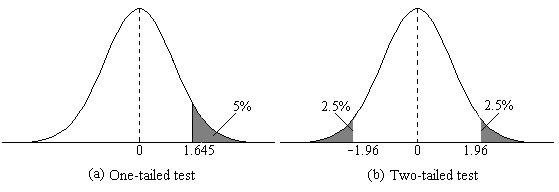


### Two Tailed

In [ ]:
# Inputs
sample_mean = 17        # Replace with the sample mean (x̄)
pop_mean = 18           # Population mean under H0 (μ)
sample_std = 4.5        # Sample standard deviation (s)
sample_size = 48        # Sample size (n)

alpha = 0.05          # Significance level

# Calculate the test statistic
tobs = (sample_mean - pop_mean) / (sample_std / np.sqrt(sample_size))

# Degrees of freedom
df = sample_size - 1


# Calculate the two-tailed p-value
p_value = 2 * stats.t.sf(np.abs(tobs), df)

# Output
print(f"Test Statistic (t): {tobs:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
else:
    print("Fail to reject the null hypothesis (H0).")

Test Statistic (t): 0.8570
P-Value: 0.3956
Fail to reject the null hypothesis (H0).


### One Tailed


In [ ]:
# Inputs
sample_mean = 34.66   # Replace with the sample mean (x̄)
pop_mean = 30         # Population mean under H0 (μ)
sample_std = 10.12    # Sample standard deviation (s)
sample_size = 40      # Sample size (n)
alpha = 0.05          # Significance level

# Calculate the test statistic
tobs = (sample_mean - pop_mean) / (sample_std / np.sqrt(sample_size))

# Degrees of freedom
df = sample_size - 1

# One-tailed p-value
# Uncomment the appropriate line for the test direction
p_value = stats.t.sf(tobs, df)  # Right-tailed test (H_a: μ > μ0)
# p_value = stats.t.cdf(t_statistic, df)  # Left-tailed test (H_a: μ < μ0)

# Output
print(f"Test Statistic (t): {tobs:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
else:
    print("Fail to reject the null hypothesis (H0).")

# T Test

## One Sample T Test:
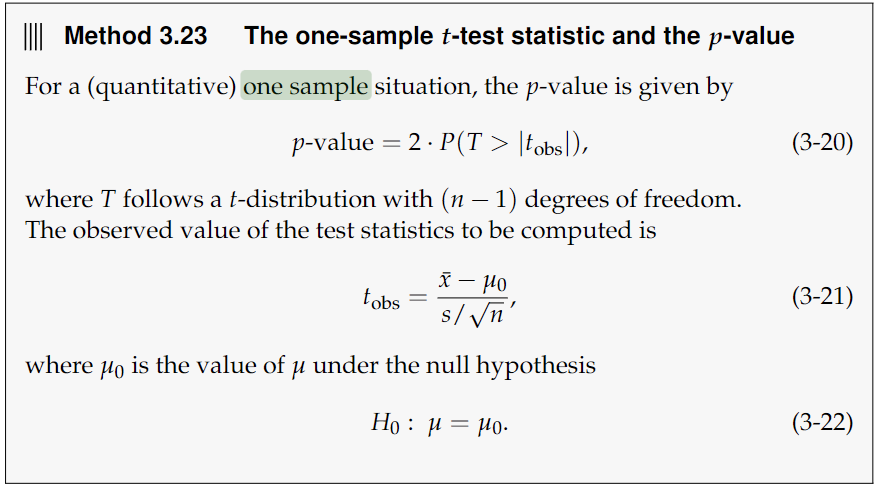

In [ ]:
from scipy.stats import ttest_1samp

arr = np.concatenate((np.ones(20), np.zeros(85-20)))

# Example: Test if the mean of sample data is significantly different from 50
data = [8500, 10300, 6800, 10600, 4900, 6200, 10800, 5700, 5100, 9000]
pop_mean = 10000

data = arr

t_stat, p_value = ttest_1samp(data, popmean=pop_mean)

lower, higher = ttest_1samp(data, popmean=99999999999999999).confidence_interval(0.90)
print(f"Conf: [{lower:.3f};{higher:.3f}]") # quick way of calculating conf. popmean has no meaning.

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Conf: [0.158;0.312]
T-statistic: -216061.1453
P-value: 0.0000


In [ ]:
# Inputs
x_bar = 34.66    # Sample mean
mu = 30             # Hypothesized mean
n = 40
df = n-1            # Degrees of freedom

std = 10.12


t_obs = (x_bar - mu) / (std / math.sqrt(n))      # Observed t-statistic

# Calculate standard error
se = x_bar / t_obs

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_obs), df))



alpha = 0.01
# Critical value
critical_value = stats.t.ppf(1 - alpha / 2, df)

# Display results
print(f"Critical_value: {critical_value}")
print(f"t_obs: {t_obs:.6f}")
print(f"Standard Error (se): {se:.6f}")
print(f"p-value: {p_value:.6f}")

Critical_value: 2.707913183517646
t_obs: 2.912295
Standard Error (se): 11.901266
p-value: 0.005908


## Independent two-sample t-test

In [ ]:
from scipy.stats import ttest_ind

# Example: Compare two independent groups
group1 = [5.1, 5.5, 5.8, 6.0]
group2 = [4.9, 5.0, 5.2, 5.1]

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Set equal_var=True if variances are equal

print(ttest_ind(group1, group2, equal_var=False).confidence_interval(0.95))  # Set equal_var=True if variances are equal
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

## Parried t-test
The paired $t$-test assumes:

* The data consists of paired observations (e.g., $X_i$ and $Y_i$ for each subject).
* The differences $D_i = X_i - Y_i$ are normally distributed.
* The differences $D_i$ are independent and identically distributed (i.i.d.).
* The scale of measurement is continuous or interval.
* The sample is randomly selected from the population.

In [ ]:
from scipy.stats import ttest_rel

# Example: Compare two related groups
before = [50, 55, 60, 65]
after = [52, 54, 59, 63]
t_stat, p_value = ttest_rel(before, after)


print(ttest_rel(before, after).confidence_interval(0.10))
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

In [ ]:
# use when mean of two groups are dependant 
# if the hypothesis is not simply that the mean difference is 0 
# in the example the hypothesis is h_0 : mean_current - mean_new = 0.05
currentModel = np.array([7.964, 7.813, 8.299, 8.219, 9.832, 9.829, 9.842, 9.498, 7.023, 8.408])
newModel = np.array([7.932, 7.762 , 8.243, 8.174, 9.782, 9.775, 9.794, 9.445, 6.942, 8.347])

null_difference = 0.05
differences = currentModel - newModel

m = len(differences)
print("n:", m)

meanDiff = np.mean(differences)
stDeviation = np.std(differences, ddof=1)
standardErrorDiff = stDeviation/np.sqrt(m)

tStat = (meanDiff - null_difference) / standardErrorDiff

# Step 4: Compute the p-value
pValueDiff = 2 * (1 - stats.t.cdf(abs(tStat), df=m-1))
print(f"tStat {tStat} pVal {pValueDiff} meandiff {meanDiff} standardErr {standardErrorDiff}")


# OBS!!!! t-statistic and p-value directly if the hypthesis is h_0 : mean_current - mean_new = 0
#t_stat, p_value = stats.ttest_rel(currentModel, newModel)
#print(t_stat, p_value)

### power t test: 

In [ ]:
from statsmodels.stats.power import TTestIndPower

# Given values
delta = 1000  # detectable mean difference (steps)
m = 14        # sample size per group
alpha = 0.01  # significance level (1%)
power = 0.80  # desired power (80%)

# Initialize the TTestIndPower class

# Calculate the required effect size (Cohen's d)
# This function calculates the effect size given the sample size, alpha, and power
effect_size = TTestIndPower().solve_power(nobs1=m, alpha=alpha, power=power, effect_size=None)

# Now calculate the population standard deviation
# Cohen's d = delta / sigma  ->  sigma = delta / Cohen's d
sigma = delta / effect_size

# Print the result, rounded down to the nearest whole number
print(f"The required population standard deviation is: {sigma} steps")

# The (Welch) two-sample t-test

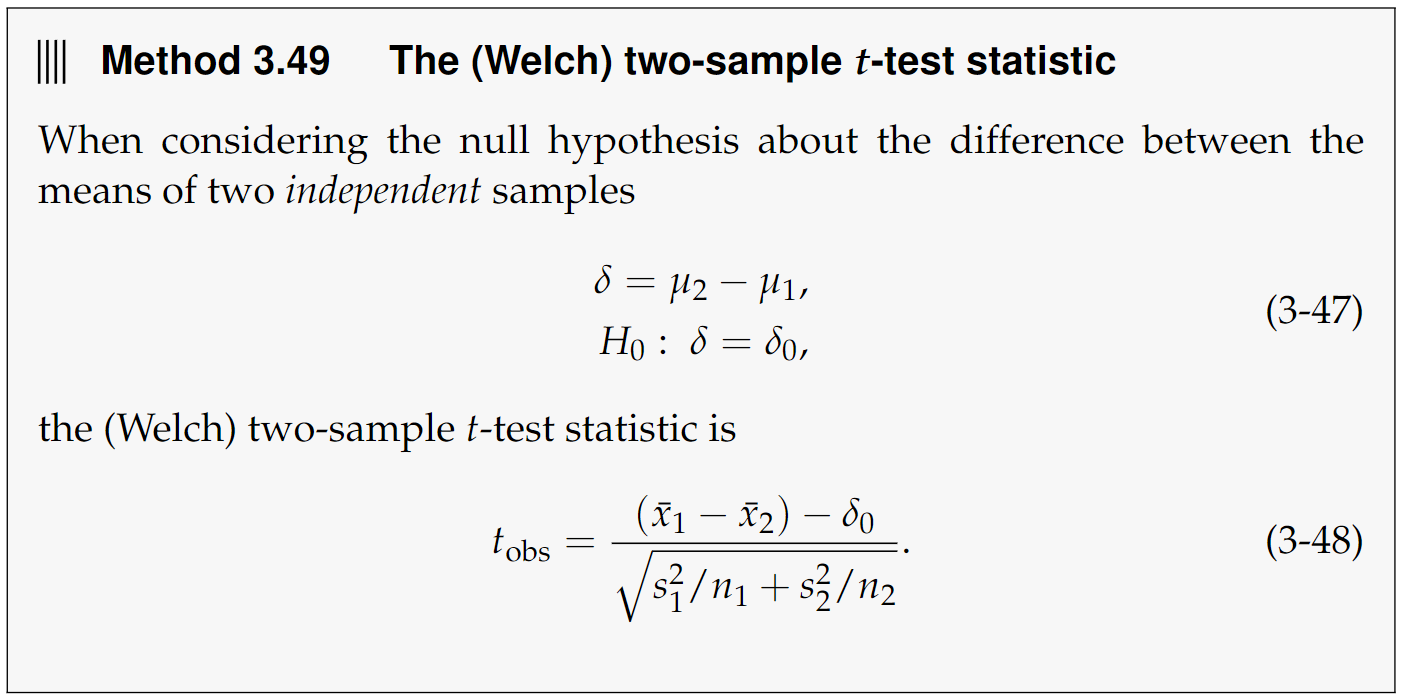


In [ ]:
#  The (Welch) two-sample t-test
# Sample data
sample1 = []
sample2 = []

# Calculate sample statistics
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)  # Sample variances
n1 = len(sample2)
n2 = len(sample1)

# Calculate t_obs
t_obs = (mean1 - mean2) / np.sqrt((var1 / n1) + (var2 / n2))

# Calculate degrees of freedom (Welch-Satterthwaite equation)
numerator = (var1 / n1 + var2 / n2) ** 2
denominator = ((var1 / n1) ** 2) / (n1 - 1) + ((var2 / n2) ** 2) / (n2 - 1)
df = numerator / denominator

print(f"t_obs: {t_obs:.4f}")
print(f"df: {df:.4f}")

t_obs: -23.9243
df: 322.6755


In [ ]:
# The (Welch) two-sample t-test without data
# Calculate sample statistics
mean1 = 736.4 #np.mean(sample1)
mean2 = 769.9 #np.mean(sample2)
var1 = 169.1 #np.var(sample1, ddof=1)
var2 = 402.7 #np.var(sample2, ddof=1)  # Sample variances
n1 = 598 #len(sample2)
n2 = 240 #len(sample1)

# Calculate t_obs
t_obs = (mean1 - mean2) / np.sqrt((var1 / n1) + (var2 / n2))

# Calculate degrees of freedom (Welch-Satterthwaite equation)
numerator = (var1 / n1 + var2 / n2) ** 2
denominator = ((var1 / n1) ** 2) / (n1 - 1) + ((var2 / n2) ** 2) / (n2 - 1)
df = numerator / denominator

print(f"t_obs: {t_obs}")
print(f"df: {df:.4f}")

t_obs: -23.924344843791303
df: 322.6755


# Linear Regression

## OLS Regression Results Explained: 

### Explanation of OLS Regression Results

| Field                  | Description                                                                                 |
|------------------------|---------------------------------------------------------------------------------------------|
| **Dependent Variable** | The outcome variable (`y`) being predicted by the model.                                    |
| **R-squared**          | The proportion of the variance in the dependent variable explained by the independent variable(s). A value of 0.906 means the model explains 90.6% of the variance. |
| **Adjusted R-squared** | Adjusted version of R-squared, accounts for the number of predictors in the model.          |
| **No. Observations**   | The number of data points (observations) used to fit the model. Here, it is 10.             |
| **F-statistic**        | A measure of overall model significance, testing if at least one predictor is non-zero.     |
| **Prob (F-statistic)** | The p-value for the F-statistic, indicating the significance level of the model. A low value (e.g., 0.000022) suggests the model is statistically significant. |
| **Covariance Type**    | Indicates the method used to estimate standard errors. `Nonrobust` means no special adjustments for heteroscedasticity or autocorrelation were made. |
| **Coef.**              | The estimated coefficient for each predictor, representing its effect on the dependent variable. |
| **Std. Err.**          | The standard error of the coefficient, representing the uncertainty of the estimate.         |
| **t**                  | The t-statistic for each coefficient, testing whether the coefficient is significantly different from zero.  the t value can be used to test an effect of x1, ie. if there is a significant association between x1 and y. |
| **P>\|t\|**                 | The p-value for the t-statistic, showing the probability that the coefficient is zero. A small value (e.g., <0.05) indicates statistical significance. |
| **[0.025, 0.975]**     | The 95% confidence interval for the coefficient. It shows the range within which the true value likely lies. |
| Number of observations is equal to the degrees of freedom plus the number of parameters in the model. | |


## Simple Linear Regression

### Model Creation

In [67]:



# data x
y = np.array([2.33,4.21,6.01,7.51,8.46,8.93,9.45,10.70,10.55,10.74])
# data to be predicted
x = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]) 


fit = smf.ols('y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()


print(fit.summary(slim=True))

# Confidence intervals at different significance levels
conf_99 = fit.conf_int(alpha=0.01)  # 99% CI
conf_95 = fit.conf_int(alpha=0.05)  # 95% CI
conf_90 = fit.conf_int(alpha=0.10)  # 90% CI

print("\nConfidence Intervals:")
print("99% Confidence Interval:\n", conf_99)
print("95% Confidence Interval:\n", conf_95)
print("90% Confidence Interval:\n", conf_90)




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.894
No. Observations:                  10   F-statistic:                     77.07
Covariance Type:            nonrobust   Prob (F-statistic):           2.22e-05
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8953      0.642      4.512      0.002       1.415       4.375
x              0.0182      0.002      8.779      0.000       0.013       0.023

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Confidence Intervals:
99% Confidence Interval:
                   0         1
Intercept  0.742056  5.048611
x          0.011218  0.025099
95% Confidence Interval:
                   0     

c:\Users\tobia\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Confidence Interval:

TODO: Write the formula for how to calculate confidence interval

In [40]:
from scipy.stats import t

# Given values
alpha = 0.01  # significance level (alpha%)

df = fit.model.df_resid       # degrees of freedom
# Calculate the critical value for the two-tailed test
critical_value = t.ppf(1 - alpha / 2, df)

# Print the result
print(f"The critical value for the test is: {critical_value:.2f}")



conf_interval_99 = fit.conf_int(alpha=0.01)
conf_interval_95 = fit.conf_int(alpha=0.05)
conf_interval_90 = fit.conf_int(alpha=0.10)

# Format and display results
print("Confidence Intervals for Regression Coefficients beta_0 and beta_1\n")
print("99% Confidence Interval:")
print(conf_interval_99.to_string(header=["Lower Bound", "Upper Bound"], index=["Intercept (b0)", "Slope (b1)"]))
print("\n95% Confidence Interval:")
print(conf_interval_95.to_string(header=["Lower Bound", "Upper Bound"], index=["Intercept (b0)", "Slope (b1)"]))
print("\n90% Confidence Interval:")
print(conf_interval_90.to_string(header=["Lower Bound", "Upper Bound"], index=["Intercept (b0)", "Slope (b1)"]))

The critical value for the test is: 3.36
Confidence Intervals for Regression Coefficients beta_0 and beta_1

99% Confidence Interval:
          Lower Bound Upper Bound
Intercept -277.839272   40.663691
x           30.821508   68.959906

95% Confidence Interval:
          Lower Bound Upper Bound
Intercept -228.034044   -9.141536
x           36.785320   62.996095

90% Confidence Interval:
          Lower Bound Upper Bound
Intercept -206.844599  -30.330981
x           39.322601   60.458814


### Prediction Interval:

In [ ]:
x = 7

new_x = pd.DataFrame({'x': [x]})
# Get 99% prediction intervals for these values
prediction_99 = fit.get_prediction(new_x).summary_frame(alpha=0.01)
# Get 95% prediction interval
prediction_95 = fit.get_prediction(new_x).summary_frame(alpha=0.05)
# Get 90% prediction interval
prediction_90 = fit.get_prediction(new_x).summary_frame(alpha=0.10)


# Print each prediction interval
print("99% Prediction Interval for x = 2.5:")
print(prediction_99[['mean', 'obs_ci_lower', 'obs_ci_upper']])

print("\n95% Prediction Interval for x = 2.5:")
print(prediction_95[['mean', 'obs_ci_lower', 'obs_ci_upper']])

print("\n90% Prediction Interval for x = 2.5:")
print(prediction_90[['mean', 'obs_ci_lower', 'obs_ci_upper']])


99% Prediction Interval for x = 2.5:
          mean  obs_ci_lower  obs_ci_upper
0  3433.803571   2573.598991   4294.008152

95% Prediction Interval for x = 2.5:
          mean  obs_ci_lower  obs_ci_upper
0  3433.803571   2829.041707   4038.565435

90% Prediction Interval for x = 2.5:
          mean  obs_ci_lower  obs_ci_upper
0  3433.803571   2941.865034   3925.742108



### Model validation

1. **Model Assumptions**:
   - Residuals should be **normally distributed** (check the Normal Q-Q plot).
   - Residuals should have **constant variance** (homoscedasticity) and **independence** (check residuals vs. fitted values plot).
   - A high $R^2$ value **does not guarantee valid assumptions**.

2. **Diagnostic Plots**:
   - **Normal Q-Q Plot**:
     - Indicates if residuals follow a normal distribution.
   - **Residuals vs. Fitted Plot**:
     - Identifies non-linearity or dependency of residuals on fitted values.


<br>

| **Observation**                         | **Indication**                                                                 | **Solution**                                                                                   |
|------------------------------------------|--------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| Random scatter in residuals vs. fitted  | Residuals are independent (assumption holds).                                  | None (model is appropriate).               | needed.                                                                              |
| Clear trend or curve                     | Residuals depend on fitted values (non-linearity).                             | Relationship is not linear.                | 
| Funnel shape (increasing spread)         | Heteroscedasticity (variance of residuals changes with fitted values).         | Missing variables or poor model structure. | 
| Clustering in specific areas             | Residuals may not be independent or related to groups.                        | Grouping effects or omitted variables.      |
| Residuals increase/decrease consistently | Indicates bias or incorrect specification (e.g., omitted terms).              | Model is under-specified.                  | 


### Residuals:

In [ ]:
residuals = fit.resid

#print("Residuals:")
#print(residuals)
#print(np.sqrt(fit.mse_resid))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot residuals against the fitted values
axs[0].scatter(fit.fittedvalues, residuals, color='blue', s=100, alpha=0.7, edgecolor='k', label='Residuals')
axs[0].axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Line')
axs[0].set_xlabel("Fitted Values", fontsize=14)
axs[0].set_ylabel("Residuals", fontsize=14)
axs[0].set_title("Residual Plot", fontsize=16)
axs[0].legend()
axs[0].grid()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axs[1])
axs[1].set_title("Q-Q Plot of Residuals", fontsize=16)
axs[1].set_xlabel("Theoretical Quantiles", fontsize=14)
axs[1].set_ylabel("Sample Quantiles", fontsize=14)
axs[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()
plt.show()

# Statistical analysis

| **Analysis Type**              | **Use When**                                                                                  | **Example**                                                                                     |
|---------------------------------|----------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **Multiple Linear Regression**  | Continuous response, multiple predictors, or goal is prediction                              | Modeling how diet and exercise influence weight.                                               |
| **Independence Test (r × c)**   | Testing association between two categorical variables                                         | Testing if feed type and health status are related.                                             |
| **Paired t-Test**               | Comparing means in **dependent** samples (pre-post measures or matched pairs)                | Comparing weight before and after treatment for the same chickens.                             |
| **One-way ANOVA**               | Comparing means in **three or more independent groups**                                       | Testing if mean weight change differs across three feed types.                                  |
| **t-Test**                      | Comparing means in **two independent groups**                                                | Testing if mean weight change differs between Feed A and Feed B.   

# Simulations & bootstrapping

## Bootstrapping
### **When to Use Parametric vs. Non-Parametric Bootstrapping:**

**Parametric Bootstrapping:**

Use when the underlying distribution of the data is known or can be reasonably well-approximated by a specific parametric model (e.g., normal distribution, exponential distribution). 

This approach is more efficient if the model assumption is accurate.

**Non-Parametric Bootstrapping:**

Use when the underlying distribution is unknown or hard to specify. 

It relies only on the observed data and makes fewer assumptions, making it more flexible and robust in situations where parametric assumptions might fail.

### parametric bootstrapping
- **Definition**: Resampling is done based on a specified parametric model assumed to describe the data-generating process.
- **Procedure**:
  1. Fit a parametric model (e.g., normal distribution) to the original data.
  2. Generate new synthetic datasets (bootstrap samples) by sampling from this fitted model.
  3. Calculate the statistic of interest for each bootstrap sample.
- **Assumptions**: Relies on the correctness of the parametric model used.
- **Advantages**: Efficient when the model assumption is valid, and computationally less intensive as only model parameters need to be estimated.
- **Disadvantages**: Sensitive to model misspecification; if the model is wrong, results may be misleading.

In [ ]:
# Data: Heights
heights = np.array([162, 172, 178, 154, 173, 174, 166, 166, 166, 164, 167, 163, 165, 170, 177])

# Set seed for reproducibility
np.random.seed(1234)

# Number of simulations
k = 100000

# Simulating samples
sim_samples = np.random.choice(heights, size=(k, 30), replace=True)

# Calculating a statistic (e.g., mean) for each simulation
sim_stats = np.mean(sim_samples, axis=1)

# Quantiles of the simulated statistics
quantiles = np.percentile(sim_stats, [2.5, 97.5])

print(quantiles)


In [ ]:
import numpy as np

# Parameters
median_cm = 3.93
mean_cm = 4.03

sd_cm = 0.49
n = 30
k = 10000

# Set seed
np.random.seed(2023)

# Simulate samples
sim_samples = np.random.normal(loc=mean_cm, scale=sd_cm, size=(k, n))

# Calculate medians for each simulation
sim_medians = np.median(sim_samples, axis=1)

# Calculate 0.5th and 99.5th percentiles
quantiles = np.round(np.quantile(sim_medians, [0.005, 0.995]), 2)

print(quantiles)

[3.74 4.31]


In [81]:
import numpy as np

# Corrected sampling
x = np.random.normal(loc=2, scale=np.sqrt(2), size=10000)  # Mean=2, Variance=2
y = np.random.normal(loc=-1, scale=np.sqrt(3), size=10000) # Mean=-1, Variance=3

# Linear combination
mean = 2 * x + y

# Compute mean
print(np.mean(mean))






2.9729163351547863


### non-parametric bootstrapping
- **Definition**: Resampling is done directly from the observed data without assuming any specific parametric distribution.
- **Procedure**:
  1. Randomly sample (with replacement) from the original data to create bootstrap samples.
  2. Calculate the statistic of interest for each bootstrap sample.
- **Assumptions**: No explicit distributional assumptions; assumes the data is representative of the population.
- **Advantages**: Flexible and robust, as it does not depend on a specific model.
- **Disadvantages**: May require more computational resources, and results may be less efficient for small sample sizes.

In [86]:
# todo NONE PARAMETIC BOOSTRATPPING.


# LIneare propegration



In [82]:
import numpy as np

# Corrected sampling
x = np.random.normal(loc=2, scale=np.sqrt(2), size=10000)  # Mean=2, Variance=2
y = np.random.normal(loc=-1, scale=np.sqrt(3), size=10000) # Mean=-1, Variance=3

# Linear combination
mean = 2 * x + y

# Compute mean
print(np.mean(mean))


2.9939373746565368


# Proportions

## CHI squared

| **Test**                          | **Purpose**                                                                 | **Null Hypothesis**                                                       |
|-----------------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Goodness-of-fit test**          | Compares observed data with a specified theoretical distribution.            | The observed data follows the expected distribution.                      |
| **Test for independence**         | Examines the relationship between two categorical variables in a contingency table. | The two categorical variables are independent of each other.            

**Degrees of Freedom:**
1. **Goodness-of-fit test**:
   - Degrees of freedom = $ \text{df} = k - 1 - c $, where:
     - $ k $ is the number of categories or groups,
     - $ c $ is the number of parameters estimated from the data (often 0 if no parameters are estimated).
  
2. **Test for independence (contingency table)**:
   - Degrees of freedom = $ \text{df} = (r - 1)(c - 1) $, where:
     - $ r $ is the number of rows in the contingency table,
     - $ c $ is the number of columns in the contingency table.




Expected value:
To calculate the expected count in any cell of a contingency table, we use the following formula:

$E_{ij} = \frac{(Row\ Total_i \times Column\ Total_j)}{Grand\ Total}$


In [ ]:
# Given data
row_total = 82
column_total = 101
grand_total = 503

# Calculate the expected number of males in the age group 18-24
expected = (row_total * column_total) / grand_total

print(f"expected value: {expected}")

## Chi-Squared Test of Independence

A rule of thumb for validity in chi-squared tests is that all expected values must be greater than 5.
The expected values are calculated based on the observed data and the assumption of no difference in proportions.
If this rule is met, the results of the chi-squared test are considered valid.




In [68]:
# Example contingency table (rows and columns represent categories)
contingency_table = np.array([[35, 64, 42, 20], [30, 60, 55, 45], [8 ,14 ,8 ,7]])

# Perform the Chi-squared Test for Independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# CHECK IF ALL THE VALUES ARE OVER 5!!!
print("Expected Frequencies:\n", expected)

# Check if all expected values are above 5
if np.all(expected >= 5):
    print("All expected frequencies are greater than or equal to 5. The test results are valid.")
else:
    print("Some expected frequencies are less than 5. The test results may not be valid.")


alpha = 0.10  # significance level
print()
# Interpret the p-value
if p_value < alpha:
    print(f"The p-value ({p_value:.4f}) is less than the significance level ({alpha}).")
    print("This suggests a significant association between the variables. Reject the null hypothesis.")
else:
    print(f"The p-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}).")
    print("There is no significant evidence of association between the variables. Fail to reject the null hypothesis.")
    

print()
# Critical value for Chi-squared distribution at 90% confidence level (alpha = 0.10) with df = 6
chi_crit = stats.chi2.ppf(1 - alpha, df=dof)  # critical value for 90% confidence
print(f"Critical Value (Chi-squared) at 90% confidence: {chi_crit:.4f}")
# Interpret the p-value and compare with the critic al value
if chi2_stat > chi_crit:
    print("The Chi-squared statistic is greater than the critical value, so we reject the null hypothesis.")
else:
    print("The Chi-squared statistic is less than or equal to the critical value, so we fail to reject the null hypothesis.")
    
    


Chi-squared Statistic: 10.1771
P-value: 0.11738880337446683
Degrees of Freedom: 6
Expected Frequencies:
 [[30.29123711 57.2628866  43.56958763 29.87628866]
 [35.74742268 67.57731959 51.41752577 35.25773196]
 [ 6.96134021 13.15979381 10.0128866   6.86597938]]
All expected frequencies are greater than or equal to 5. The test results are valid.

The p-value (0.1174) is greater than or equal to the significance level (0.1).
There is no significant evidence of association between the variables. Fail to reject the null hypothesis.

Critical Value (Chi-squared) at 90% confidence: 10.6446
The Chi-squared statistic is less than or equal to the critical value, so we fail to reject the null hypothesis.


In [ ]:


# Given data
observed_test_statistic = 10.177  # The observed test statistic
df = 6  # Degrees of freedom
confidence_level = 0.90  # 90% confidence level

# Calculate the critical value (χcrit) for the chi-squared distribution
chi_crit = stats.chi2.ppf(confidence_level, df)

# Print the critical value and comparison
print(f"Critical value (χcrit) for 90% quantile with 6 degrees of freedom: {chi_crit}")
print(f"Observed test statistic: {observed_test_statistic}")

# Comparison with the observed test statistic
if observed_test_statistic > chi_crit:
    print("Reject the null hypothesis: The observed test statistic is greater than the critical value.")
else:
    print("Fail to reject the null hypothesis: The observed test statistic is less than or equal to the critical value.")

Critical value (χcrit) for 90% quantile with 6 degrees of freedom: 10.644640675668422
Observed test statistic: 10.177
Fail to reject the null hypothesis: The observed test statistic is less than or equal to the critical value.


In [ ]:
# Example data
p_hat = 7/105  # sample proportion

m = 105  # sample size
alpha = 0.05  # significance level

# 1. Calculate the 95% Confidence Interval for the proportion using statsmodels
# Calculate the number of successes
count = int(p_hat * m)

# Calculate the confidence interval using statsmodels' proportion_confint method
ci_lower, ci_upper = sm.stats.proportion_confint(count=count, nobs=m, alpha=alpha, method='normal')
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

# 2. Perform Hypothesis Test for the population proportion
p_0 = 0.5  # hypothesized population proportion (null hypothesis)

# Standard error for the population proportion under the null hypothesis
se = np.sqrt(p_0 * (1 - p_0) / m)

# Z-test statistic calculation
z = (p_hat - p_0) / se
print(f"Z-score: {z:.4f}")

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))
print(f"P-value: {p_value:.4f}")

# Decision rule: Reject null hypothesis if p-value <= alpha
reject_null = p_value <= alpha
print(f"Reject null hypothesis? {reject_null}")

## **Calculating a 95% Confidence Interval for a Proportion**

The confidence interval (CI) for a sample proportion is given by:

$$
CI = \hat{p} \pm z \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$

Where:
- $ \hat{p} $ is the sample proportion ($ \frac{\text{successes}}{\text{total}} $),
- $ z $ is the critical value for the desired confidence level (1.96 for 95% confidence),
- $ n $ is the sample size,
- The margin of error is $ z \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} $.


The **plus-two approach** is a statistical method designed to improve the accuracy of confidence intervals for proportions in small-sample cases. It is particularly useful when the sample size is small, or the observed proportion is close to 0 or 1, which can make the standard methods less reliable.

**When to Use the Plus-Two Approach**
- When the sample size is small.
- When either $ np \leq 15 $ or $ n(1 - p) \leq 15 $.
- This method adjusts the observed count of successes and the total sample size to prevent extreme proportions (close to 0 or 1) from distorting the confidence interval.


**The Plus-Two Adjustment**
1. Adjust the number of successes $ \tilde{x} $):
   $$
   \tilde{x} = x + 2
   $$
   Where \( x $ is the observed number of successes.

2. Adjust the sample size $( \tilde{n} $):
   $$
   \tilde{n} = n + 4
   $$
   Where $ n $ is the original sample size.

3. Compute the adjusted proportion $( \tilde{p} $):
   \[
   \tilde{p} = \frac{\tilde{x}}{\tilde{n}}
   \]


In [70]:
# Given data
successes = 14048
total = 28176
confidence_level = 0.95

# Calculate the sample proportion
p_hat = successes / total
print(f"p_hat: {p_hat}")


# Calculate the z-score for the desired confidence level
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # 1.96 for 95% confidence

print(f"z: {z}")

# Calculate the margin of error
margin_of_error = z * np.sqrt((p_hat * (1 - p_hat)) / total)

# Calculate the confidence interval
lower_bound = p_hat - margin_of_error
upper_bound = p_hat + margin_of_error

# Print the results
print(f"Sample proportion (p̂): {p_hat:.2f}")
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

p_hat: 0.498580352072686
z: 1.959963984540054
Sample proportion (p̂): 0.50
Confidence Interval: (0.4927, 0.5044)


## Sample size formula for the CI of a proportion
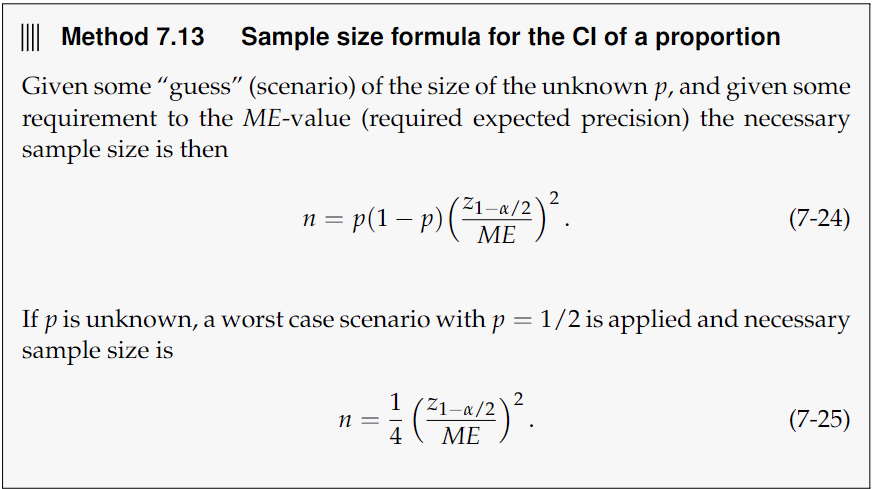

In [ ]:


# Given data
confidence_level = 0.90  # 95% confidence level

p_hat = 0.25  # Estimated proportion (use 0.5 if unknown)

E = 0.01  # Desired margin of error

# Calculate the Z-score for the desired confidence level
z = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the required sample size
n = (z**2 * p_hat * (1 - p_hat)) / E**2

# Round up to the next whole number since sample size must be an integer
n = np.ceil(n)

print(f"Required sample size (n): {int(n)}")

Required sample size (n): 5073


# ANOVA




**If you are comparing 3 groups, and each group has 10 observations:**

$k = 3$ (number of groups)
$n = 30$ (total observations across all groups).


| Source of Variation | Degrees of Freedom | Sums of Squares | Mean Sum of Squares                     | Test-Statistic $F$                   | p-value                 |
|----------------------|--------------------|-----------------|-----------------------------------------|--------------------------------------|-------------------------|
| Treatment           | $k - 1$           | $SS(\text{Tr})$ | $MS(\text{Tr}) = \frac{SS(\text{Tr})}{k-1}$ | $F_{\text{obs}} = \frac{MS(\text{Tr})}{MSE}$ | $P(F > F_{\text{obs}})$ |
| Residual            | $n - k$           | $SSE$           | $MSE = \frac{SSE}{n-k}$                 |                                      |                         |
| Total               | $n−1=(k−1)+(n−k)$          | $SST$           |                                         |                                      |                         |

\n

| Symbol          | Full Name                 | Description                                                                                     |
|------------------|---------------------------|-------------------------------------------------------------------------------------------------|
| $SST$           | Total Sum of Squares      | Measures the total variability in the data, combining variability due to treatments and errors. |
| $SS(\text{Tr})$ | Treatment Sum of Squares  | Measures the variability between the group means and the overall mean (explained variation).    |
| $SSE$           | Error Sum of Squares      | Measures the variability within each group (unexplained variation or residual variation).       |
| $MS(\text{Tr})$ | Mean Square for Treatment | Represents the average variation between the groups, calculated as $MS(\text{Tr}) = \frac{SS(\text{Tr})}{k-1}$. |
| $MSE$           | Mean Square Error         | Represents the average variation within the groups, calculated as $MSE = \frac{SSE}{n-k}$.     |
| $\hat {\sigma}_{error} $ | estimate of the error standard deviation | Taking the square root of $MSE$ yields the standard deviation,  the original units of measurement, making it easier to interpret. |
| $F_{\text{obs}}$| Observed F-statistic      | A ratio of the variation between groups to the variation within groups, $F_{\text{obs}} = \frac{MS(\text{Tr})}{MSE}$. |
| $P(F > F_{\text{obs}})$ | p-value           | The probability of observing the F-statistic (or something more extreme) under the null hypothesis. |
| $df_{\text{between}}$ | Degrees of Freedom Between Groups | The number of independent comparisons between groups, $df_{\text{between}} = k-1$.           |
| $df_{\text{within}}$ | Degrees of Freedom Within Groups | The number of independent pieces of information within the groups, $df_{\text{within}} = n-k$. |
|$\hat{\alpha}_{Tr}$|Estimate of the effect|$\frac {SS(Tr)}{n}-μ$|


In [ ]:
# Sample data for ANOVA analysis (example dataset)
data = {
    'Consumption': [5.4, 4.5, 4.6, 4.4, 4.9, 3.3, 4.1, 4.6, 4.8, 4.6,
                    5.2, 4.7, 4.4, 4.8, 4.8, 5.2, 4.9, 4.8, 5.6, 5.5],
    'Month': ['Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'May', 'May', 'May', 'May', 'May',
              'Aug', 'Aug', 'Aug', 'Aug', 'Aug', 'Nov', 'Nov', 'Nov', 'Nov', 'Nov']
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Fit an ANOVA model using OLS (Ordinary Least Squares)
model = smf.ols('Consumption ~ C(Month)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
group2,1.423374,1.0,0.057192,0.833264
group3,0.572405,1.0,0.022999,0.893374
Residual,49.775422,2.0,NaN,NaN


### One-Way ANOVA

**P-value Interpretation:**
* Low P-value (< 0.05)
    : There is evidence to reject the null hypothesis, suggesting significant differences exist among the group means.


* High P-value (≥ 0.05)
    : There is not enough evidence to reject the null hypothesis, implying the group means are likely not significantly different.

In [ ]:


# Define your groups
group1 = [27, 22, 18, 26, 24]
group2 = [32, 22, 32, 25, 25]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group1, group2)

# Results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Create anova table
data = {
    'value': np.concatenate((group1, group2)),
    'group': ['group1'] * len(group1) + ['group2'] * len(group2)
}

df = pd.DataFrame(data)
# Fit the model
model = smf.ols('value ~ C(group)', data=df).fit()

# Generate ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)



F-statistic: 2.1552238805970148
P-value: 0.18027134238356257
          sum_sq   df         F    PR(>F)
C(group)    36.1  1.0  2.155224  0.180271
Residual   134.0  8.0       NaN       NaN


## Least Significant Difference (LSD)

Least Significant Difference (LSD) is a statistical value used in post hoc analysis to determine the smallest difference between two treatment means that is considered statistically significant at a given confidence level.

**Formula**
The Least Significant Difference (LSD) between two treatment means is calculated using the formula:

$$
\text{LSD} = t_{\alpha/2} \cdot \sqrt{\frac{2 \cdot MS_{\text{Residual}}}{m}}
$$

### Variables:
- $ t_{\alpha/2} $: Critical $ t $-value at a two-tailed significance level (e.g., $$ \alpha = 0.05 $).
- $ MS_{\text{Residual}} $: Mean Square for Residual from the ANOVA table.
- $ m $: Number of observations per group (assumes balanced design).

In [ ]:

# Input values
alpha = 0.05                    # Significance level
df_residual = 50                # Degrees of freedom for Residual
ms_residual = 10              # Mean Square Residual
m = 6                           # Sample size per group

# Calculate critical t-value
t_alpha = stats.t.ppf(1 - alpha / 2, df_residual)

# Compute LSD
lsd = t_alpha * math.sqrt((2 * ms_residual) / m)

# Display the result
print(f"Critical t-value (t_alpha): {t_alpha:.3f}")
print(f"Least Significant Difference (LSD): {lsd:.3f}")

Critical t-value (t_alpha): 2.009
Least Significant Difference (LSD): 3.667


## Estimate of the effect

Effect of Location 1 = $\frac {SS(Tr)}{n}-μ$


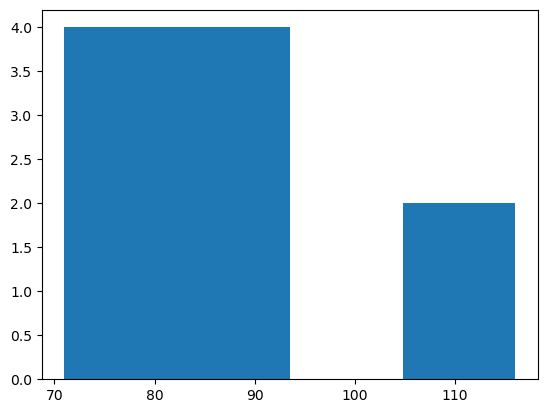

84.5
188.35999999999999
1073


9.137931034482758

In [ ]:
trace = np.array([77, 111, 71, 91, 116, 81, 83, 80, 86, 92])
plt.hist(trace, bins=4)
plt.show()

print(np.quantile(trace, 0.5))

print(trace.var())


notrace = np.array([38, 35, 35, 42, 35])

total = np.sum(trace) + np.sum(notrace)

print(total)

result = (np.sum(notrace) * (18 + 35)) / total


result



ImportError: cannot import name 'proportions_ztest' from 'scipy.stats' (c:\Users\tobia\anaconda3\Lib\site-packages\scipy\stats\__init__.py)